In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from surprise.prediction_algorithms.matrix_factorization import SVD

In [5]:
def GetDataframe():
    df = pd.read_csv("C:/Users/AJ/Desktop/ml-latest-small/ratings.csv")
    df.drop('timestamp', axis=1, inplace=True)
    num_users = df.userId.unique().shape[0]
    num_items = df.movieId.unique().shape[0]

    print('Number of users: %d, number of items: %d.' % (num_users, num_items))
    return df, num_users, num_items

def GetRMatrix(data):
    X = data.values
    users = X[:,0]
    movies = X[:,1]

    movie_map = {}
    reverse_movie_map = {}
    new_id = 0
    for idx in range(len(movies)):
        item = int(movies[idx])
        if item not in movie_map:
            movie_map[item] = new_id
            reverse_movie_map[new_id] = item
            new_id += 1

    ratings = X[:,2]
    num_ratings = int(len(ratings))
    R = np.zeros((num_users, num_items))

    for i in np.arange(num_ratings):
        R[int(users[i]-1), movie_map[movies[i]]] = ratings[i]
        
    return R, users, movies, ratings, movie_map, reverse_movie_map

df, num_users, num_items = GetDataframe()
R, users, movies, ratings, movie_map, reverse_movie_map = GetRMatrix(df)

Number of users: 610, number of items: 9724.


In [34]:
from surprise.model_selection import cross_validate
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df,reader)

ks = np.arange(2,52,2)
rsmes=np.zeros((len(ks),1))
maes=np.zeros((len(ks),1))

for i,k in enumerate(ks):
    metrics = cross_validate(SVD(n_factors=k), data, measures=['RMSE', 'MAE'],return_train_measures=True, cv=10)
    rsme=np.mean(metrics[u'test_rmse'])
    rsmes[i,0]=rsme
    mae=np.mean(metrics[u'test_mae'])
    maes[i,0]=mae
    print(k)


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


('min rsme: ', 0.8649946649993734)


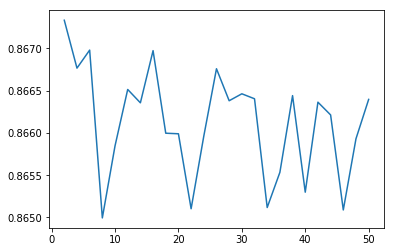

In [58]:
plt.plot(ks,rsmes)
print('min rsme: ', np.min(rsmes))

('min mae: ', 0.6651203497463751)


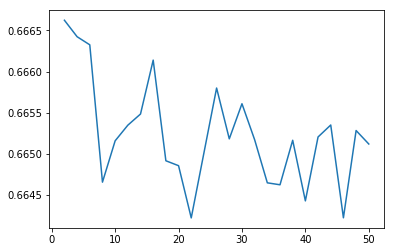

In [59]:
plt.plot(ks,maes)
print('min mae: ', np.min(maes))

In [83]:
X=df.values


pop_X = X[ratings >2 ,:]
unpop_X=X[ratings <=2 ,:]

nanR = R.copy()
nanR[nanR == 0] = np.nan
movie_vars = np.nanvar(nanR, axis = 0)

hi_var_inds = []

for i in np.arange(len(movies)):
    if movie_vars[movie_map[movies[i]]]>=2:
        hi_var_inds.append(i)

hi_var_X=X[hi_var_inds,:]




In [60]:
pop_df=pd.DataFrame(pop_X)
data = Dataset.load_from_df(pop_df,reader)

ks = np.arange(2,52,2)
rsmes=np.zeros((len(ks),1))
maes=np.zeros((len(ks),1))

for i,k in enumerate(ks):
    metrics = cross_validate(SVD(n_factors=k), data, measures=['RMSE', 'MAE'],return_train_measures=True, cv=10)
    rsme=np.mean(metrics[u'test_rmse'])
    rsmes[i,0]=rsme
    mae=np.mean(metrics[u'test_mae'])
    maes[i,0]=mae
    print(k)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


('min rsme: ', 0.6288003141365192)
('min mae: ', 0.5100371093263798)


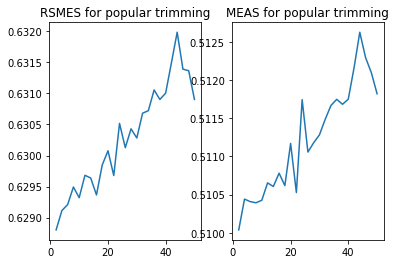

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(ks, rsmes)
ax1.set_title('RSMES for popular trimming')
ax2.plot(ks, maes)
ax2.set_title('MEAS for popular trimming')
print('min rsme: ', np.min(rsmes))
print('min mae: ', np.min(maes))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
('min rsme: ', 0.49122260355735525)
('min mae: ', 0.41708398086591886)


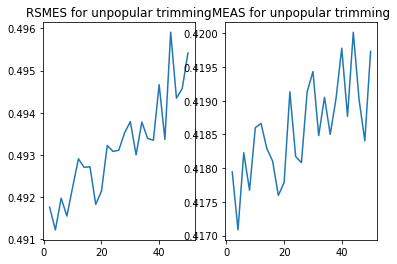

In [173]:
unpop_df=pd.DataFrame(unpop_X)
data = Dataset.load_from_df(unpop_df,reader)

ks = np.arange(2,52,2)
rsmes=np.zeros((len(ks),1))
maes=np.zeros((len(ks),1))

for i,k in enumerate(ks):
    metrics = cross_validate(SVD(n_factors=k), data, measures=['RMSE', 'MAE'],return_train_measures=True, cv=10)
    rsme=np.mean(metrics[u'test_rmse'])
    rsmes[i,0]=rsme
    mae=np.mean(metrics[u'test_mae'])
    maes[i,0]=mae
    print(k)
    
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(ks, rsmes)
ax1.set_title('RSMES for unpopular trimming')
ax2.plot(ks, maes)
ax2.set_title('MEAS for unpopular trimming')
print('min rsme: ', np.min(rsmes))
print('min mae: ', np.min(maes))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
('min rsme: ', 1.5326786331219293)
('min mae: ', 1.3349975203153024)


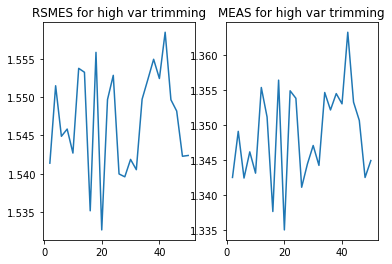

In [176]:
hi_var_X_df=pd.DataFrame(hi_var_X)
data = Dataset.load_from_df(hi_var_X_df,reader)

ks = np.arange(2,52,2)
rsmes=np.zeros((len(ks),1))
maes=np.zeros((len(ks),1))

for i,k in enumerate(ks):
    metrics = cross_validate(SVD(n_factors=k), data, measures=['RMSE', 'MAE'],return_train_measures=True, cv=10)
    rsme=np.mean(metrics[u'test_rmse'])
    rsmes[i,0]=rsme
    mae=np.mean(metrics[u'test_mae'])
    maes[i,0]=mae
    print(k)
    
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(ks, rsmes)
ax1.set_title('RSMES for high var trimming')
ax2.plot(ks, maes)
ax2.set_title('MEAS for high var trimming')
print('min rsme: ', np.min(rsmes))
print('min mae: ', np.min(maes))

In [141]:
from surprise.model_selection import train_test_split


threshs = np.arange(2.5,4.5,.5)

fprs= []
tprs= []

for thresh in threshs:
    reader_bin = Reader(rating_scale=(0, 1))
    X=df.values
    X_thresh=X

    above_thresh=X_thresh[:,2]>thresh
    below_thresh=X_thresh[:,2]<=thresh

    X_thresh[above_thresh,2]=1
    X_thresh[below_thresh,2]=0

    df_X_thresh=pd.DataFrame(X_thresh)
    data = Dataset.load_from_df(df_X_thresh,reader_bin)

    trainset, testset = train_test_split(data, test_size=.1)

    clf_svd = SVD(n_factors=22)

    predictions = clf_svd.fit(trainset).test(testset)
    test_array=np.array(testset)
    y_true=test_array[:,2]

    pred_array = np.array(predictions)
    scores=pred_array[:,3]

    fpr, tpr, thresholds=roc_curve(y_true, scores)
    fprs.append(fpr)
    tprs.append(tpr)


[0.         0.15582656 0.15816704 ... 0.99987682 1.         1.        ]
[0.         0.0697182  0.06988109 ... 0.99951132 0.99951132 1.        ]
[0.         0.03082614 0.03349774 ... 0.99773942 0.99773942 1.        ]
[0.         0.00140056 0.00373483 ... 0.9859944  0.98646125 1.        ]


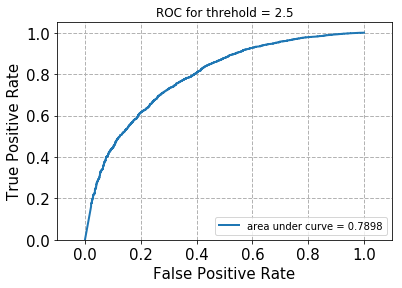

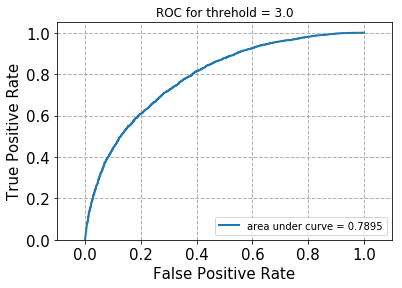

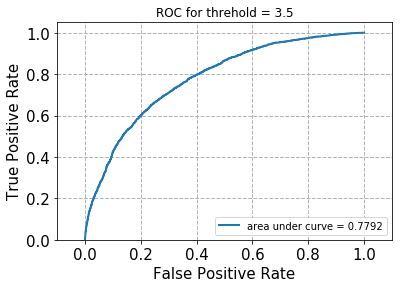

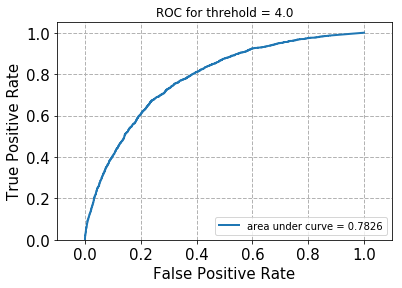

In [143]:
from sklearn.metrics import auc
def plot_roc(fpr, tpr, title):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title(title)
    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

for i,thresh in enumerate(threshs):

    plot_roc(fprs[i],tprs[i], 'ROC for threhold = ' + str(thresh))



In [150]:
from sklearn.decomposition import NMF
model = NMF(n_components=20, init='random', random_state=0)
U = model.fit_transform(R)
V_T = model.components_

In [172]:
V=V_T.T

movie_ranks = np.argsort(V, axis=0)

sort_movies_by_V=movies[movie_ranks]
top_10 =sort_movies_by_V[:10,:]

movie_df = pd.read_csv("C:/Users/AJ/Desktop/ml-latest-small/movies.csv")
movie_data= movie_df.values
movie_ids=movie_data[:,0]
genres=movie_data[:,2]

genre_dict = dict(zip(movie_ids, genres))
genre_dict

for col in range(top_10.shape[1]):
    print('V column: ' + str(col)+'-------------------------------------')
    for row in range(top_10.shape[0]):
        print('V row: ' + str(row))
        print(genre_dict[top_10[row,col]])


V column: 0-------------------------------------
V row: 0
Action|Crime|Drama|IMAX
V row: 1
Drama|Thriller|War
V row: 2
Adventure|Children
V row: 3
Action|Adventure|Comedy|Crime
V row: 4
Action|Drama|War
V row: 5
Adventure|Children|Comedy|Musical
V row: 6
Comedy
V row: 7
Action|Adventure|Thriller
V row: 8
Drama|Thriller
V row: 9
Adventure|Children|Fantasy
V column: 1-------------------------------------
V row: 0
Action|Crime|Drama|IMAX
V row: 1
Comedy
V row: 2
Comedy
V row: 3
Comedy|Romance
V row: 4
Drama|Romance
V row: 5
Drama
V row: 6
Adventure|Children|Comedy
V row: 7
Action|Crime|Drama
V row: 8
Action|Comedy|Drama
V row: 9
Action|Comedy
V column: 2-------------------------------------
V row: 0
Adventure|Animation|Children|Comedy|Fantasy
V row: 1
Comedy
V row: 2
Action|Adventure|Comedy|Drama|War
V row: 3
Drama|Romance
V row: 4
Horror|Mystery|Thriller
V row: 5
Children|Comedy
V row: 6
Comedy|Drama|Fantasy|Romance
V row: 7
Comedy
V row: 8
Drama
V row: 9
Action|Mystery
V column: 3------